### 1. Business Understanding

#### 1) Extract reviews of any product from ecommerce website like amazon
#### 2) Perform emotion mining

### 2. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Win10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Win10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Win10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 3.  Data collection and description
#### 3.1 Connecting to Amazom and download reviews

In [3]:
samsung_galaxy_z_flip_reviews=[]

In [30]:
for i in range(1,31):
    sam=[]
    url="https://www.amazon.in/Samsung-Galaxy-Mirror-256GB-Storage/product-reviews/B08G1CPGJ2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs ={"class","a-size-base review-text reviewstext-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    samsung_galaxy_z_flip_reviews = samsung_galaxy_z_flip_reviews+op

### 3.2 Downloading review from Amazon.in for the phone Samsung Galaxy Z Flip

In [31]:
samsung_galaxy_z_flip_reviews = list(set(samsung_galaxy_z_flip_reviews))
samsung_galaxy_z_flip_reviews

['\n\n  My first one+7t & its make me so sad. I received the ph with manufacturing defect in display. Gum came out from the edges of display. How can a consumer aspects from a reputed brand after he paying 40000/- 🤔😭😟🥺😓\n\n',
 "\n\n  A One plus user.Oneplus One -> Oneplus 3T -> Oneplus 7T.I don't like other android phones due it's UI, love stock android.Camara is awesomeFacing problem with notifications, don't know what at top.I was expecting great battery but its average.As i moved from 3T to 7T, I had to buy wireless headphones and was worried about this. But Bluetooth connection is also good/stable.\n\n",
 "\n\n  After reading a lot of geeky reviews on YouTube and portals, I bought Oneplus7t. Pls, note I have been using OnePlus from last many years now so my expectations were clear. My experience with the device says that most of the reviews or unboxing things are influenced. Pls, note I have bought it with my own money unlike leading reviewers or unboxing video geeks who get it for

### 3.3 Cleaning the text

#### Remove special character
#### Remove numbers
#### Remove hyperlink

In [34]:
txt_upd = ''.join(samsung_galaxy_z_flip_reviews)

In [35]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() 
txt_upd = re.sub("[0-9]" "]+"," ",txt_upd).lower()
txt_upd = re.sub(r'^https?:\/\/.*[\n\n]*','',txt_upd).lower()

In [36]:
text_tokens = word_tokenize(txt_upd)
text_tokens

['my',
 'first',
 'one',
 't',
 'its',
 'make',
 'me',
 'so',
 'sad',
 'i',
 'received',
 'the',
 'ph',
 'with',
 'manufacturing',
 'defect',
 'in',
 'display',
 'gum',
 'came',
 'out',
 'from',
 'the',
 'edges',
 'of',
 'display',
 'how',
 'can',
 'a',
 'consumer',
 'aspects',
 'from',
 'a',
 'reputed',
 'brand',
 'after',
 'he',
 'paying',
 'a',
 'one',
 'plus',
 'user',
 'oneplus',
 'one',
 'oneplus',
 't',
 'oneplus',
 't',
 'i',
 'don',
 't',
 'like',
 'other',
 'android',
 'phones',
 'due',
 'it',
 's',
 'ui',
 'love',
 'stock',
 'android',
 'camara',
 'is',
 'awesomefacing',
 'problem',
 'with',
 'notifications',
 'don',
 't',
 'know',
 'what',
 'at',
 'top',
 'i',
 'was',
 'expecting',
 'great',
 'battery',
 'but',
 'its',
 'average',
 'as',
 'i',
 'moved',
 'from',
 't',
 'to',
 't',
 'i',
 'had',
 'to',
 'buy',
 'wireless',
 'headphones',
 'and',
 'was',
 'worried',
 'about',
 'this',
 'but',
 'bluetooth',
 'connection',
 'is',
 'also',
 'good',
 'stable',
 'after',
 'reading

In [37]:
tokens_without_sw=[word for word in text_tokens if not word in stopwords.words()]
tokens_without_sw

['first',
 'make',
 'sad',
 'received',
 'ph',
 'manufacturing',
 'defect',
 'display',
 'gum',
 'came',
 'edges',
 'display',
 'consumer',
 'aspects',
 'reputed',
 'brand',
 'paying',
 'plus',
 'user',
 'oneplus',
 'oneplus',
 'oneplus',
 'like',
 'android',
 'phones',
 'due',
 'ui',
 'love',
 'stock',
 'android',
 'camara',
 'awesomefacing',
 'problem',
 'notifications',
 'know',
 'top',
 'expecting',
 'great',
 'battery',
 'average',
 'moved',
 'buy',
 'wireless',
 'headphones',
 'worried',
 'bluetooth',
 'connection',
 'good',
 'stable',
 'reading',
 'lot',
 'geeky',
 'reviews',
 'youtube',
 'portals',
 'bought',
 'oneplus',
 'pls',
 'note',
 'using',
 'oneplus',
 'last',
 'many',
 'years',
 'expectations',
 'clear',
 'experience',
 'device',
 'says',
 'reviews',
 'unboxing',
 'things',
 'influenced',
 'pls',
 'note',
 'bought',
 'money',
 'unlike',
 'leading',
 'reviewers',
 'unboxing',
 'video',
 'geeks',
 'get',
 'free',
 'pls',
 'go',
 'blindly',
 'go',
 'users',
 'reviews',
 '

### 3.4 Create the DF

In [38]:
tf = TfidfVectorizer()

In [39]:
text_tf = tf.fit_transform(tokens_without_sw)
text_tf

<884x510 sparse matrix of type '<class 'numpy.float64'>'
	with 882 stored elements in Compressed Sparse Row format>

In [40]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = feature_names)
df

,adapter,adaptor,added,always,amazing,amazon,ambiance,amoeld,amoled,android,...,work,worried,worst,would,wounds,writing,year,years,youtube,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
word_list = ' '.join(df)
word_list

'adapter adaptor added always amazing amazon ambiance amoeld amoled android angle another antutu anymore anyone aperture app apple around arrived aspects audible average avg awesome awesomefacing back background backup balanced banding base battery beautiful believe benefit best better big bigger bit blazing blindly bloatware blogging blood bluetooth blur blurred blurrry blutooth bought box brainer brand brick broken budget bulk bumpperformance butter buy caller calls camara came camera cameras capability capacitycamera capture carried carry case cast channel charge charger charges charging chipset circulation class clear clicked clicking clicks colleagues color colors coming compared comparision comparison concerning concerns conference connection cons consistent consno consumer consumes continued converter copy cost could cover cpu crisp crops curator customer day days deep defect delivery describe design desk detailed detailing details device devices directly disappointed disappoint

In [43]:
wordcloud = WordCloud(background_color='black', width = 5000, height= 3000).generate(word_list)

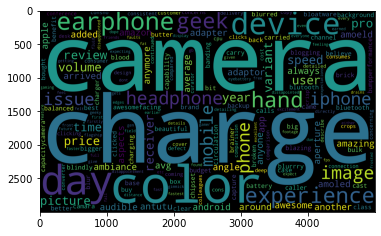

In [44]:
plt.imshow(wordcloud)

### 4 Sentimental Analysis

In [45]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [46]:
positive_words = positive_words[:]
positive_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [47]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [48]:
negative_words = negative_words[:]
negative_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

In [49]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])
txt_neg_in_nw

'blur blurred broken concerns cons defect disappointed disappointment dissapointed dope drains fall fat faults gimmick grainy hard hazy issue issues loud mess messes missed misses poor problem sad scratches slowly warp waste worried worst wounds'

In [50]:
wordcloud_neg = WordCloud(background_color='black',width=8000,height=6000).generate(txt_neg_in_nw)

In [51]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])
txt_pos_in_pw

'amazing audible awesome balanced beautiful benefit best better capability clear consistent crisp excellent excitement fast faster fastest free geeky good great greatest happy helpful improvements kudos leading like love prefer pros protect protective proves recommend recommended refresh right smart smooth stable stunning top trust useful welcome well work'

In [52]:
wordcloud_pos = WordCloud(background_color='black',width=8000, height=6000).generate(txt_pos_in_pw)

### 5.Conclusion 

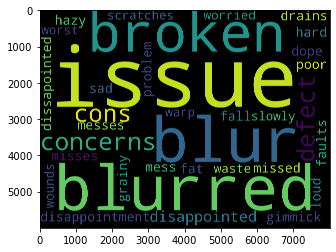

In [53]:
plt.imshow(wordcloud_neg)

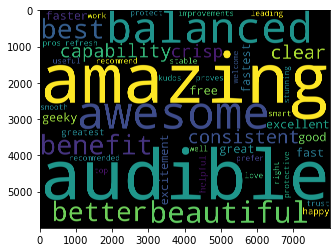

In [54]:
plt.imshow(wordcloud_pos)